In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../Data/sales_data.csv")
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.shape


(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df[df["Profit"] < 0].head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


In [9]:
df[df["Profit"] < 0].shape

(1871, 13)

In [10]:
df.groupby("Discount")["Profit"].mean().sort_values()

Discount
0.50   -310.703456
0.45   -226.646464
0.40   -111.927429
0.80   -101.796797
0.70    -95.874060
0.32    -88.560656
0.30    -45.679636
0.60    -43.077212
0.20     24.702572
0.15     27.288298
0.00     66.900292
0.10     96.055074
Name: Profit, dtype: float64

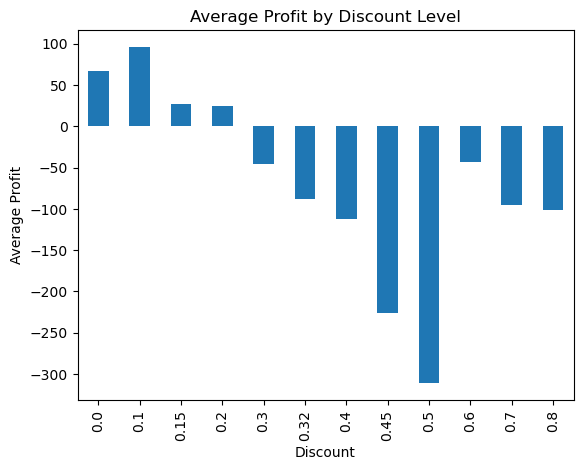

In [11]:
plt.figure()
df.groupby("Discount")["Profit"].mean().plot(kind="bar")
plt.title("Average Profit by Discount Level")
plt.xlabel("Discount")
plt.ylabel("Average Profit")
plt.show()

In [12]:
df.groupby("Category")["Profit"].sum().sort_values(ascending=False)

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

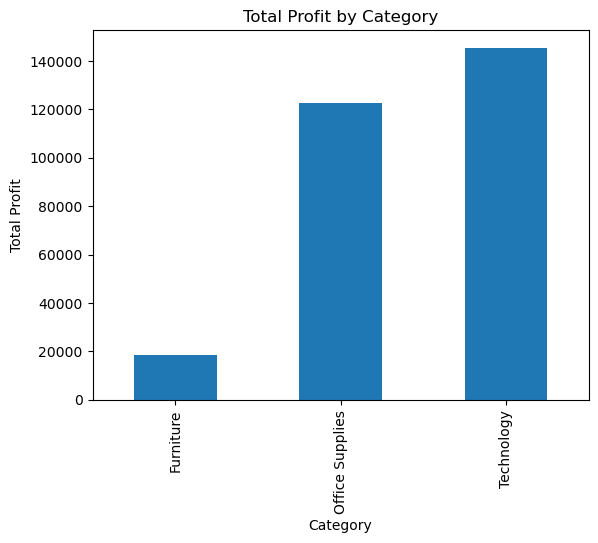

In [13]:
plt.figure()
df.groupby("Category")["Profit"].sum().plot(kind="bar")
plt.title("Total Profit by Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.show()

In [14]:
df.groupby("Category")["Discount"].mean()

Category
Furniture          0.173923
Office Supplies    0.157285
Technology         0.132323
Name: Discount, dtype: float64

In [15]:
df[df["Profit"] < 0].groupby("Category")["Profit"].count()

Category
Furniture          714
Office Supplies    886
Technology         271
Name: Profit, dtype: int64

In [16]:
df[df["Profit"] < 0].groupby("Category")["Profit"].mean()

Category
Furniture          -85.344690
Office Supplies    -63.899840
Technology        -142.361322
Name: Profit, dtype: float64

## Key Insights So Far

1. 19% of total transactions are loss-making.
2. Discounts above 30% significantly reduce profitability.
3. Technology is the most profitable category.
4. Furniture has low overall profit and highest average discount.
5. Technology has the highest loss severity per loss-making order.


In [17]:
df.groupby("Region")["Profit"].sum().sort_values(ascending=False)

Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64

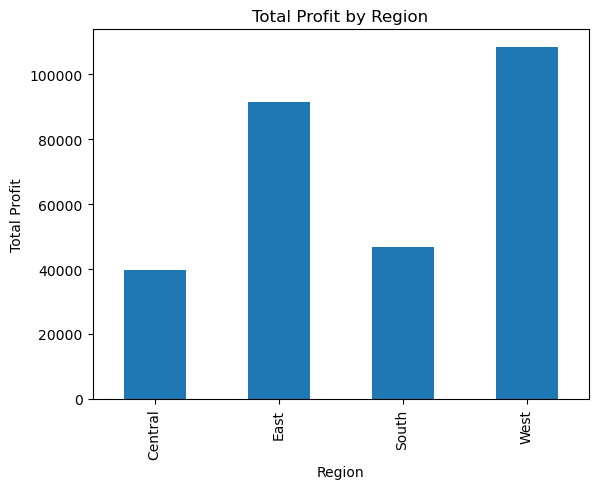

In [18]:
plt.figure()
df.groupby("Region")["Profit"].sum().plot(kind="bar")
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.show()

In [19]:
df[df["Profit"] < 0].groupby("Region")["Profit"].count()

Region
Central    741
East       553
South      259
West       318
Name: Profit, dtype: int64

In [20]:
df.groupby("Region")["Discount"].mean()

Region
Central    0.240353
East       0.145365
South      0.147253
West       0.109335
Name: Discount, dtype: float64

In [22]:
df.shape

(9994, 13)

In [23]:
df["Sales"].sum()

np.float64(2297200.8603000003)

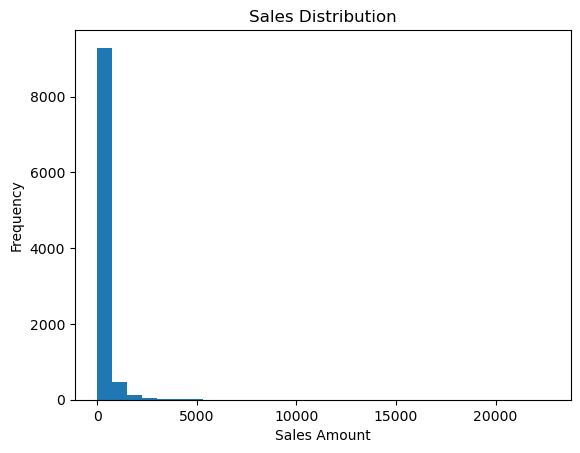

In [24]:
plt.figure()
plt.hist(df["Sales"], bins=30)
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

In [25]:
df["Sales"].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [26]:
df.sort_values("Sales", ascending=False).head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
2623,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856


In [27]:
df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64